# Import Library

In [35]:

from cartopy import config
import cartopy
import cartopy.crs as ccrs
import climtas
import cmocean
from collections import namedtuple
import dask.array
from datetime import datetime
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind 
import seaborn as sns
import sparse
from string import ascii_lowercase
import xarray as xr


import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr    
import glob
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import pandas as pd
import datetime
from matplotlib import colors
import pymannkendall as mk
from matplotlib.ticker import MaxNLocator

from matplotlib import pyplot as plt
import numpy as np
from pandas import *




In [36]:
cmap2 = plt.cm.get_cmap("plasma_r", 15)

# Import Data

In [37]:

list2=[1,2,3,4,5,6]



#DMI
d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/DMI_ACCESS/*.nc")) 

file_name = []
f=[]
for d in d_filenames:   
    
    a = xr.open_dataset(d)
    DMI_p=a.sel(time=a.time.dt.month.isin([8,9,10])) #select DMI peak months
    x=DMI_p.tos.groupby('time.year').mean(dim='time')#take the mean of each year
    z=x.rename({'year':'time'})
    del z['time']
    f.insert(-1,z)

pIOD_1=xr.concat(f, 'ensemble').isel(time=slice(0,164))
pIOD=pIOD_1

In [38]:
nino_Access_filenames = []
nino_Access_filenames = sorted(glob.glob("/g/data/w97/sl7808/Nino34/4_detrend/*.nc")) 
file_name = []
f=[]


for n in nino_Access_filenames:
    a = xr.open_dataset(n)
    
    dataout = np.empty(165,dtype=np.float64)
    start_year = 1850
    for yy in range(165):
        yr=yy+1850
        start_string = '%s-12-01' %(yr)
        end_string = '%s-02-28' %(yr+1)
        dataout[yy] = a.tos.sel(time=slice(start_string,end_string)).mean(dim='time') #sel DJF

    dm_new = xr.DataArray(
                    data   = dataout,
                    dims   = ['time'],
                    coords = {'time': np.arange(1850,2015)},
                    )
    
    sd=dm_new.sel(time=slice('1961','1990')).std(dim='time')
    nor_dm=dm_new/sd
    
    nor_dm.plot
    
    f.insert(-1,nor_dm)
    
nino=xr.concat(f, 'ensemble')
nino

<xarray.DataArray (ensemble: 20, time: 165)>
array([[-0.88225358, -0.21567213,  1.29090825, ..., -0.05340292,
         2.83334078, -1.24685577],
       [ 0.79511251, -0.29925568,  0.55478174, ...,  1.11585396,
        -0.11034973,  0.62211133],
       [-0.19218288,  0.7493613 , -0.36546519, ...,  0.28974434,
         0.32573729, -0.56657526],
       ...,
       [-1.01796375, -0.54519087,  2.19460138, ...,  0.40824488,
         0.44519929, -0.73778422],
       [ 0.57197435, -0.46572327, -0.76214227, ...,  0.18345768,
         1.3897249 ,  1.98961713],
       [-2.105748  ,  0.07455954, -2.15223142, ...,  0.71255869,
         1.58617305,  2.01969988]])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Dimensions without coordinates: ensemble

In [39]:
def choose_H(pIOD_sel,nino_sel,num,p,n): 
    if num==0:#Nino+, DMI+
        HH=H.where(pIOD_sel>p).where(nino_sel>p)
        #c=nino.where(pIOD_sel>p).where(nino_sel>p).count()
        title= 'El Nino, IOD+'
        
    elif num==1: #Nino neu, DMI+
        HH=H.where(pIOD_sel>p).where(nino_sel>n).where(nino_sel<p)
        #c=nino.where(pIOD_sel>p).where(nino_sel>n).where(nino_sel<p).count()
        title= 'ENSO neu, IOD+'
    
    elif num==2:#Nino-, DMI+
        HH=H.where(pIOD_sel>p).where(nino_sel<n)
        #c=nino.where(pIOD_sel>p).where(nino_sel<n).count()
        title='La Nina, IOD+'
        
    elif num==3: #DMI neutral, Nino +
        HH=H.where(pIOD_sel>n).where(pIOD_sel<p).where(nino_sel>p)
        #c=nino.where(pIOD_sel>n).where(pIOD_sel<p).where(nino_sel>p).count()
        title='El Nino, IOD neu'
        
    elif num==4:#Both neutral
        HH=H.where(pIOD_sel>n).where(pIOD_sel<p).where(nino_sel>n).where(nino_sel<p)
        #c=nino.where(pIOD_sel>n).where(pIOD_sel<p).where(nino_sel>n).where(nino_sel<p).count()
        title='ENSO neu, IOD neu'        

        
    elif num==5:#DMI Neu, Nino -
        HH=H.where(pIOD_sel>n).where(pIOD_sel<p).where(nino_sel<n)
        #c=nino.where(pIOD_sel>n).where(pIOD_sel<p).where(nino_sel<n).count()
        title='La Nina, IOD neu'
        
        
    elif num==6:#Nino+, DMI-
        HH=H.where(pIOD_sel<n).where(nino_sel>p) 
        #c=nino.where(pIOD_sel<n).where(nino_sel>p).count()
        title='El Nino, IOD-'

    elif num==7:#DMI -, Nino Neu
        HH=H.where(pIOD_sel<n).where(nino_sel>n).where(nino_sel<p)
        #c=nino.where(pIOD_sel<n).where(nino_sel>n).where(nino_sel<p).count()
        title= 'ENSO neu, IOD-'
    elif num==8:#Nino-, DMI-
        HH=H.where(pIOD_sel<n).where(nino_sel<n)
        #c=nino.where(pIOD_sel<n).where(nino_sel<n).count()
        title='La Nina, IOD-'
    return HH,title
        

# Fig12-15

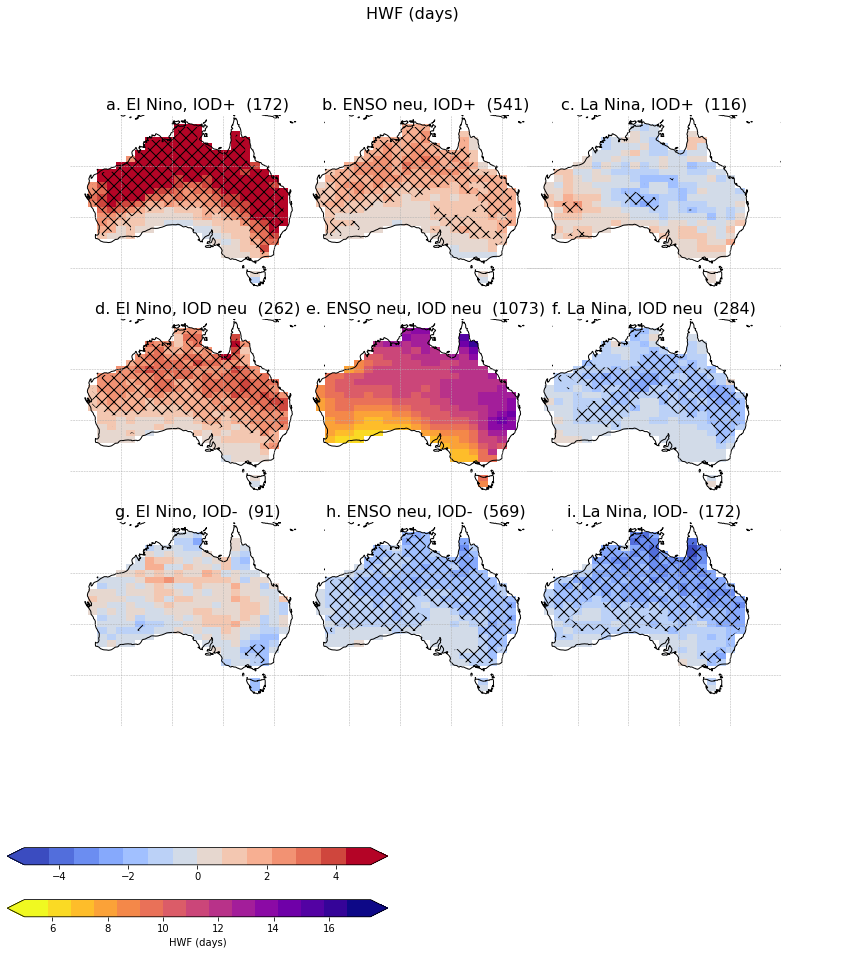

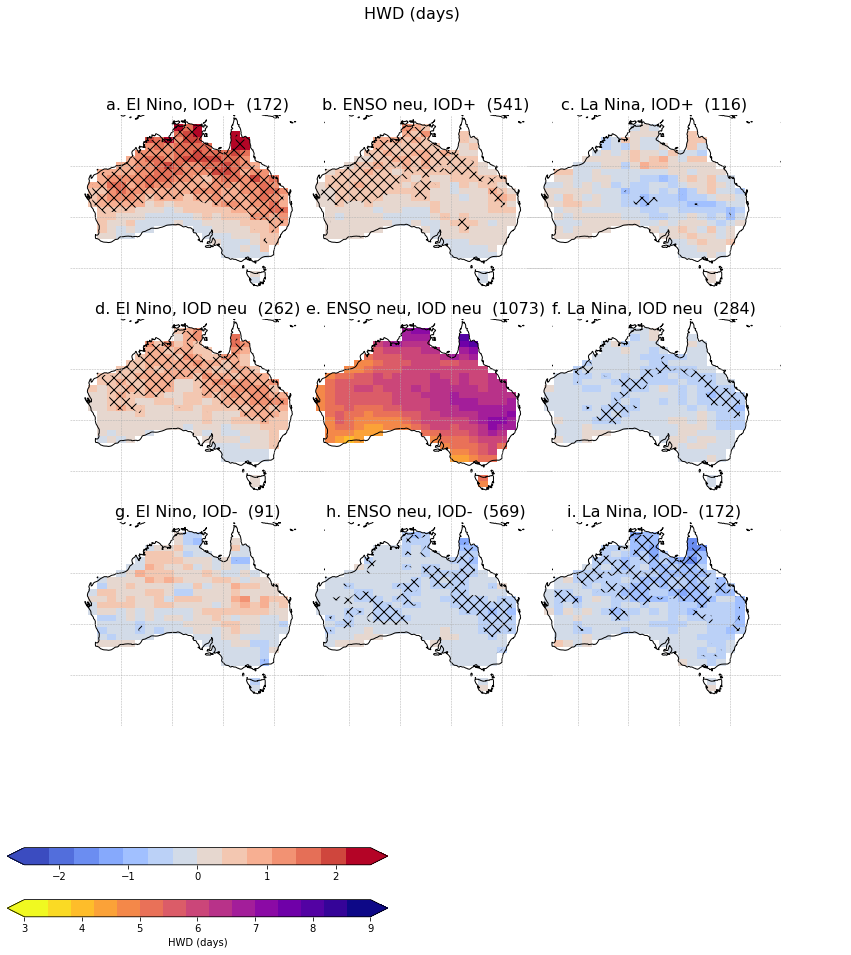

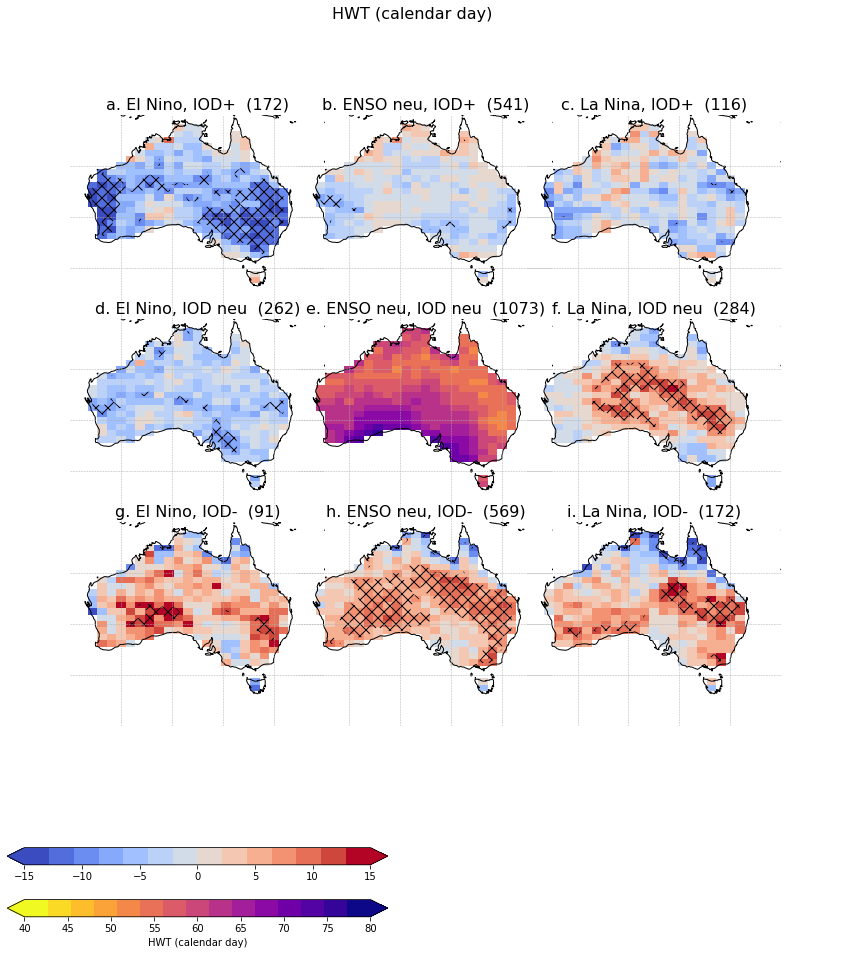

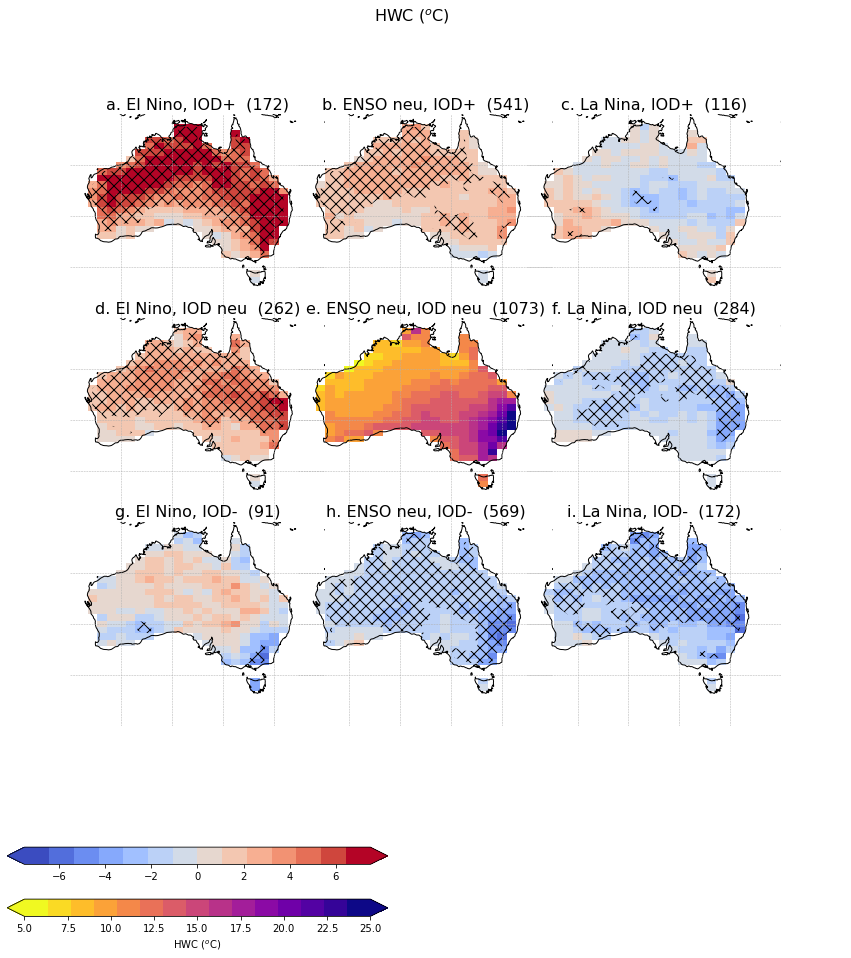

In [40]:

p=1
n=-1

cmap3=plt.cm.get_cmap("coolwarm", 14)
HWX_list_2 =["HWF (days)","HWD (days)","HWT (calendar day)",'HWC ($^o$C)']
HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF","HWC"]
vmaxlist=[17.5,9,80,25]
vminlist=[5,3,40,5]
vmaxlist2=[5,2.5,15,7.5]
vminlist2=[-5,-2.5,-15,-7.5]


land_sea = xr.open_dataset("/g/data/w97/sl7808/landmask_accessESM1-5_AUS.nc").sftlf



kklist_1=[0,0,0,1,1,1,2,2,2]
kklist_2=[0,1,2,0,1,2,0,1,2]


for (h,h2,xxx,nnn,xxx2,nnn2) in zip (HWX_list,HWX_list_2,vmaxlist,vminlist,vmaxlist2,vminlist2):
    #HWX
    fig, axes = plt.subplots(4,3, figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

    

    for i in range(3):
        for j in range(3):
            axes[j,i].axis('off') 
            axes[3,i].axis('off') 
            axes[j,i].gridlines(ylocs=[-10,-20,-30,-40],draw_labels=False,
                       linewidth=0.5, linestyle='--', edgecolor='dimgrey')
            
            

    
    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    HWA=d1[h]
    
    
    #neu 
    num=4
    g=[]
    ggg=[]
    for i in range(20): 
        nino_sel=nino.isel(ensemble=i)
        pIOD_sel=pIOD.isel(ensemble=i)
        H=HWA.isel(ensemble=i).where(land_sea>60)
        re_turn=choose_H(pIOD_sel,nino_sel,num,p,n)
        H3=re_turn[0]
        g.insert(-1,H3)

    ggg_neu=xr.concat(g, 'ensemble')  
    ggg_neu_stacked = ggg_neu.stack(ens_time=['time','ensemble'])
    ggg_neu_mean=ggg_neu.mean(dim=['ensemble','time'])
    plott=ggg_neu_mean.plot(ax=axes[1,1],vmax=xxx,vmin=nnn,cmap=cmap2, add_colorbar=False, transform=ccrs.PlateCarree())

    
    

    #plot the rest
    c_sum=0
    g=[]
    ggg=[]
    num=0
    for k1,k2 in zip (kklist_1,kklist_2):
        g=[]
        ggg=[]
        c=0
        
        for i in range(20): 
            nino_sel=nino.isel(ensemble=i)
            pIOD_sel=pIOD.isel(ensemble=i)
            H=HWA.isel(ensemble=i).where(land_sea>60)
            re_turn=choose_H(pIOD_sel,nino_sel,num,p,n)
            H3=re_turn[0]
            g.insert(-1,H3)
            
            ccc=H3.dropna(dim='time',how='all').time.count()
            c=c+ccc 
            del ccc,H3 
        ggg=xr.concat(g, 'ensemble')  
        ggg_mean=ggg.mean(dim=['ensemble','time'])
        
        ggg_stacked = ggg.stack(ens_time=['time','ensemble'])
        r = stats.ttest_ind(ggg_stacked, ggg_neu_stacked, axis=2, equal_var=False, nan_policy='omit')
        p_value = xr.DataArray(r[1], dims=('lat', 'lon'), 
                          coords={'lat': ggg['lat'],'lon': ggg['lon']})
        
        
        
        
        #plot
        ggg_diff=ggg_mean-ggg_neu_mean

        
        
        if (num!=4):
            plott_diff=ggg_diff.plot(ax=axes[k1,k2],vmax=xxx2,vmin=nnn2,cmap=cmap3, add_colorbar=False, transform=ccrs.PlateCarree())
            p_value.plot.contourf(ax=axes[k1,k2],levels=[0.00, 0.05], hatches=['xx', None], colors='none', add_colorbar=False) 
        axes[k1,k2].set_title((ascii_lowercase[num])+". "+re_turn[1]+'  ('+str(c.values)+')', fontsize=16)
        axes[k1,k2].coastlines()
        axes[k1,k2].set_ylim([-50, -10])
        axes[k1,k2].set_xlim([ 110, 160])
        c_sum=c_sum+c
        del c,ggg
        
        
        num=num+1

    

    fig.colorbar(plott, ax=axes[3,0], orientation='horizontal',extend='both',label=h2)
    fig.colorbar(plott_diff, ax=axes[3,0], orientation='horizontal',extend='both')
    fig.subplots_adjust(wspace=-0.4, hspace=0)
    fig.suptitle(h2, fontsize=16)
    
    


# Appendix

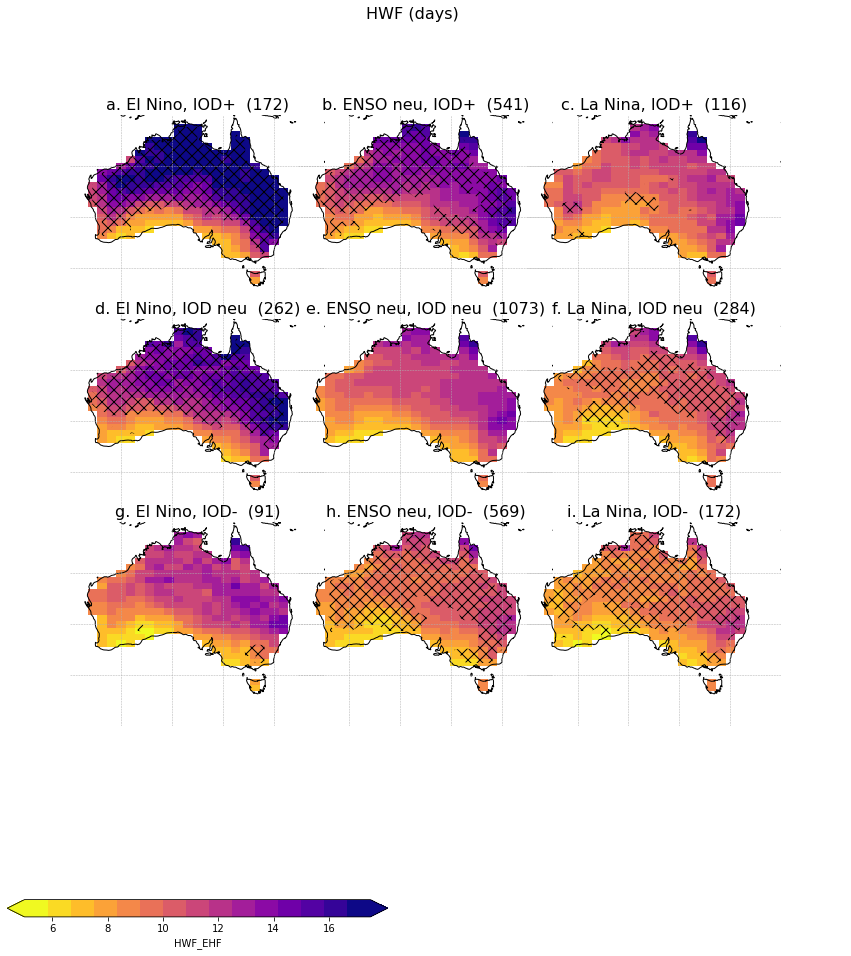

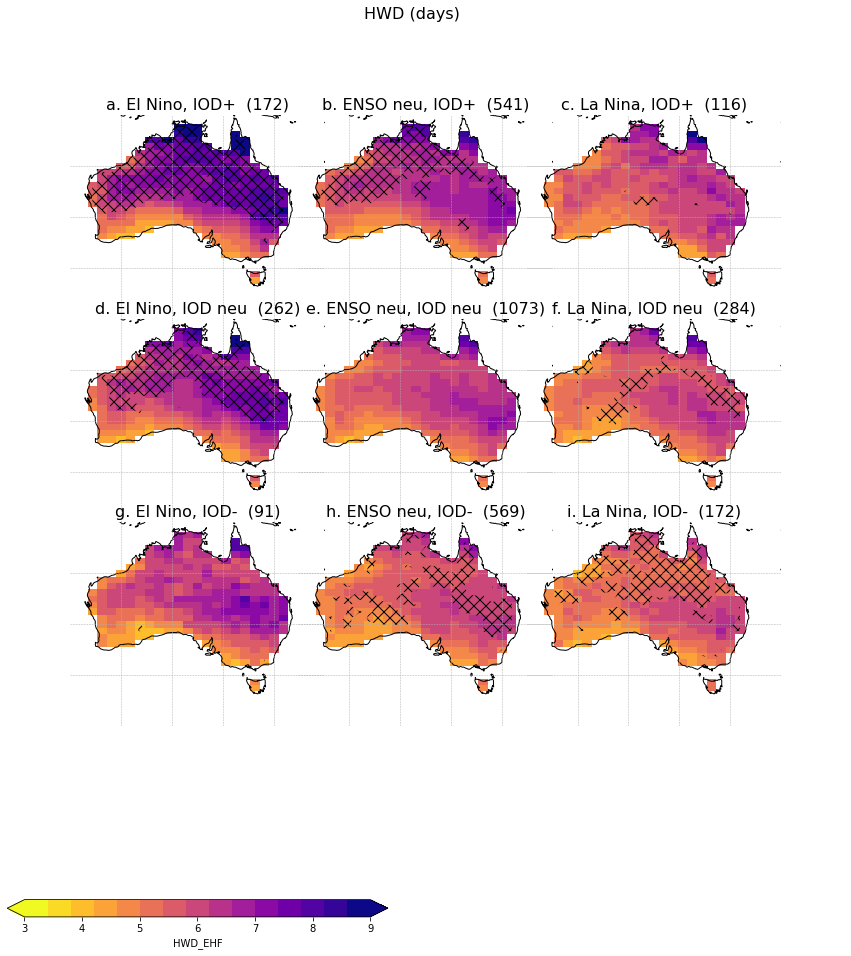

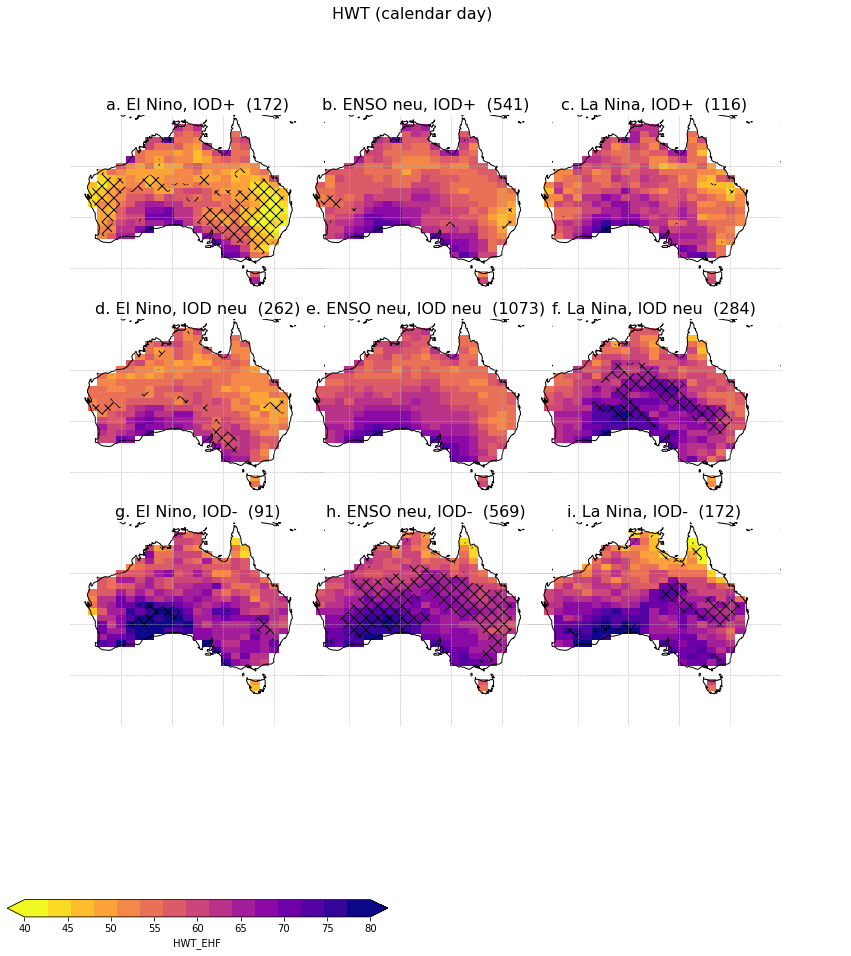

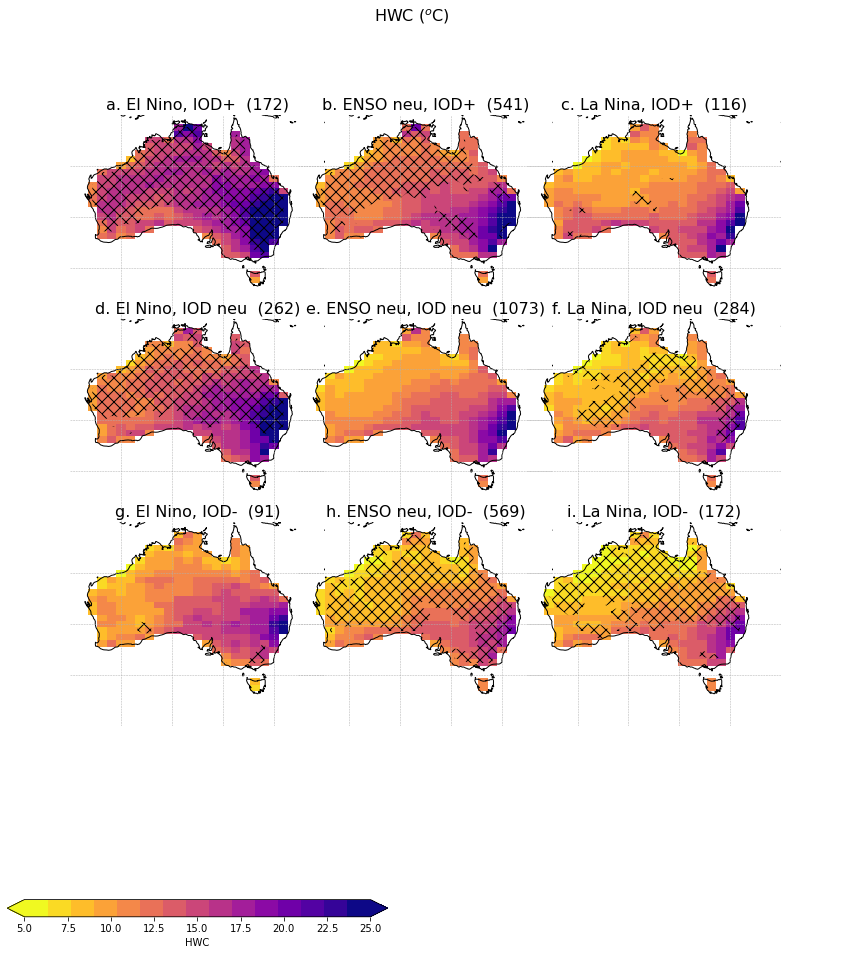

In [41]:

p=1
n=-1


HWX_list_2 =["HWF (days)","HWD (days)","HWT (calendar day)",'HWC ($^o$C)']
HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF","HWC"]
vmaxlist=[17.5,9,80,25]
vminlist=[5,3,40,5]
land_sea = xr.open_dataset("/g/data/w97/sl7808/landmask_accessESM1-5_AUS.nc").sftlf



kklist_1=[0,0,0,1,1,1,2,2,2]
kklist_2=[0,1,2,0,1,2,0,1,2]



for (h,xxx,nnn,h2) in zip (HWX_list,vmaxlist,vminlist,HWX_list_2):
    #HWX
    fig, axes = plt.subplots(4,3, figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

    

    for i in range(3):
        for j in range(3):
            axes[j,i].axis('off') 
            axes[3,i].axis('off') 
            axes[j,i].gridlines(ylocs=[-10,-20,-30,-40],draw_labels=False,
                       linewidth=0.5, linestyle='--', edgecolor='dimgrey')
            
            

    
    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    HWA=d1[h]
    
    
    #neu 
    num=4
    g=[]
    ggg=[]
    for i in range(20): 
        nino_sel=nino.isel(ensemble=i)
        pIOD_sel=pIOD.isel(ensemble=i)
        H=HWA.isel(ensemble=i).where(land_sea>60)
        re_turn=choose_H(pIOD_sel,nino_sel,num,p,n)
        H3=re_turn[0]
        g.insert(-1,H3)

    ggg_neu=xr.concat(g, 'ensemble')  
    ggg_neu_stacked = ggg_neu.stack(ens_time=['time','ensemble'])
    
    

    #plot the rest
    c_sum=0
    g=[]
    ggg=[]
    num=0
    for k1,k2 in zip (kklist_1,kklist_2):
        g=[]
        ggg=[]
        c=0
        
        for i in range(20): 
            nino_sel=nino.isel(ensemble=i)
            pIOD_sel=pIOD.isel(ensemble=i)
            H=HWA.isel(ensemble=i).where(land_sea>60)
            re_turn=choose_H(pIOD_sel,nino_sel,num,p,n)
            H3=re_turn[0]
            g.insert(-1,H3)
            
            ccc=H3.dropna(dim='time',how='all').time.count()
            c=c+ccc 
            del ccc,H3 
        ggg=xr.concat(g, 'ensemble')  
        ggg_mean=ggg.mean(dim=['ensemble','time'])
        
        ggg_stacked = ggg.stack(ens_time=['time','ensemble'])
        r = stats.ttest_ind(ggg_stacked, ggg_neu_stacked, axis=2, equal_var=False, nan_policy='omit')
        p_value = xr.DataArray(r[1], dims=('lat', 'lon'), 
                          coords={'lat': ggg['lat'],'lon': ggg['lon']})
        
        
        
        
        #plot
        plott=ggg_mean.plot(ax=axes[k1,k2],vmax=xxx,vmin=nnn,cmap=cmap2, add_colorbar=False, transform=ccrs.PlateCarree())
        if (num!=4):
            p_value.plot.contourf(ax=axes[k1,k2],levels=[0.00, 0.05], hatches=['xx', None], colors='none', add_colorbar=False) 
        axes[k1,k2].set_title((ascii_lowercase[num])+". "+re_turn[1]+'  ('+str(c.values)+')', fontsize=16)
        axes[k1,k2].coastlines()
        axes[k1,k2].set_ylim([-50, -10])
        axes[k1,k2].set_xlim([ 110, 160])
        c_sum=c_sum+c
        del c,ggg
        
        
        num=num+1

    

    fig.colorbar(plott, ax=axes[3,0], orientation='horizontal',extend='both',label=h)
    fig.subplots_adjust(wspace=-0.4, hspace=0)
    fig.suptitle(h2, fontsize=16)
    
    


# Appendix

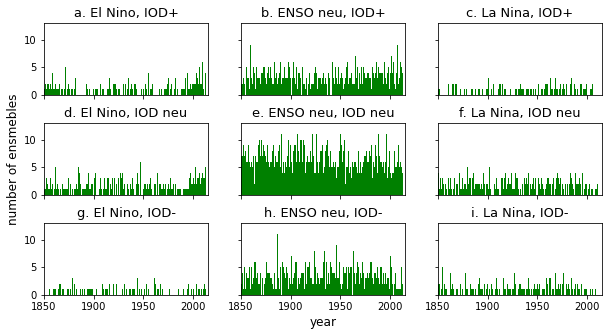

In [42]:

p=1
n=-1


h ="HWA_EHF"


kklist_1=[0,0,0,1,1,1,2,2,2]
kklist_2=[0,1,2,0,1,2,0,1,2]



#HWX
fig, axes = plt.subplots(3,3, figsize=(10,5), sharey=True, sharex=True)





d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
d1=xr.open_dataset(d, decode_times=False)
HWA=d1[h]



#plot the rest
c_sum=0
g=[]
ggg=[]
num=0
for k1,k2 in zip (kklist_1,kklist_2):
    g=[]
    ggg=[]
    c=0

    for i in range(20): 
        nino_sel=nino.isel(ensemble=i)
        pIOD_sel=pIOD.isel(ensemble=i)
        H=HWA.isel(ensemble=i).where(land_sea>60)
        re_turn=choose_H(pIOD_sel,nino_sel,num,p,n)
        H3=re_turn[0]
        
        
        ccc=H3.dropna(dim='time',how='all').time
        g.insert(-1,ccc)


    ggg=xr.concat(g, dim='t')  
    ggg.plot.hist(ax=axes[k1,k2],bins=164,color='green')
    axes[k1,k2].set_xlim([1850, 2015])
    axes[k1,k2].set_ylim([0, 13])
    axes[k1,k2].set_title(ascii_lowercase[num]+". "+re_turn[1], fontsize=13)
    axes[k1,k2].set_xlabel('', fontsize=10)
    axes[2,1].set_xlabel('year', fontsize=12)
    axes[1,0].set_ylabel('number of ensmebles', fontsize=12)
    num=num+1


fig.subplots_adjust(wspace=0.2, hspace=0.4)



